In [28]:
import pandas as pd
granularity = 10

if granularity == 50:


    df_cultura = pd.read_csv("../results_50/raw_results.csv", index_col = [0])

elif granularity == 10:


    df_cultura = pd.read_csv("../results_10/raw_results.csv", index_col = [0])


df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura['N_est_min']  =  df_cultura['min_f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura['N_est_max']  =  df_cultura['max_f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual

df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'N_est_min':'sum', 'N_est_max':'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})

df_cultura = df_cultura[df_cultura['decade'] <=1870]

In [38]:
df_cultura['decade'] = df_cultura['decade'].astype(int)

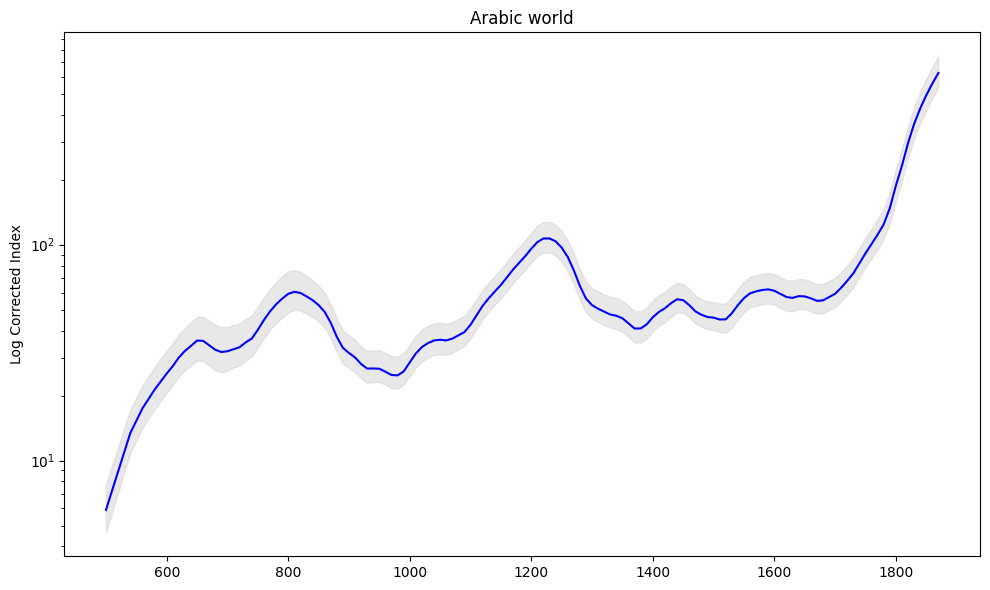

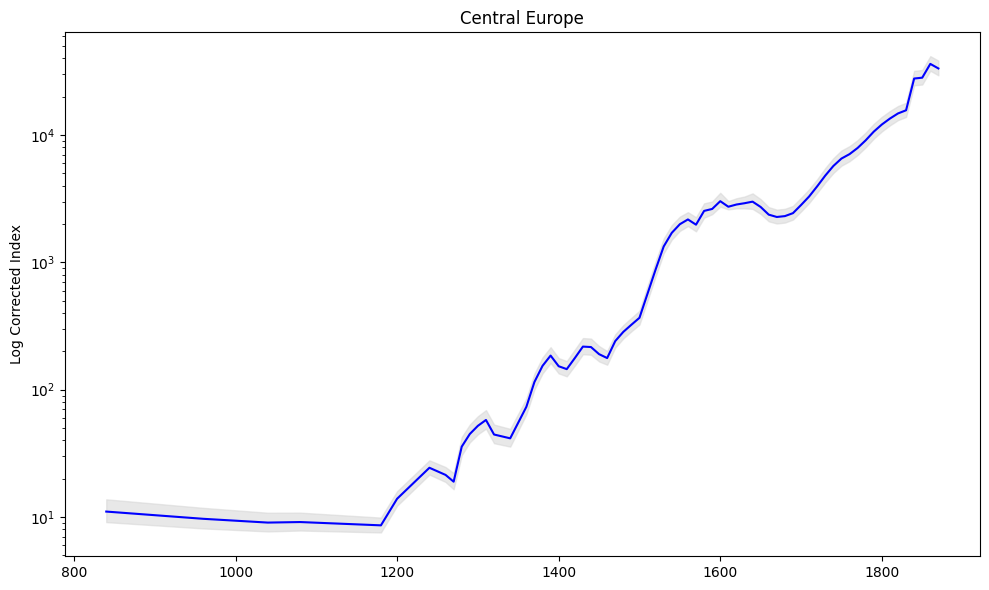

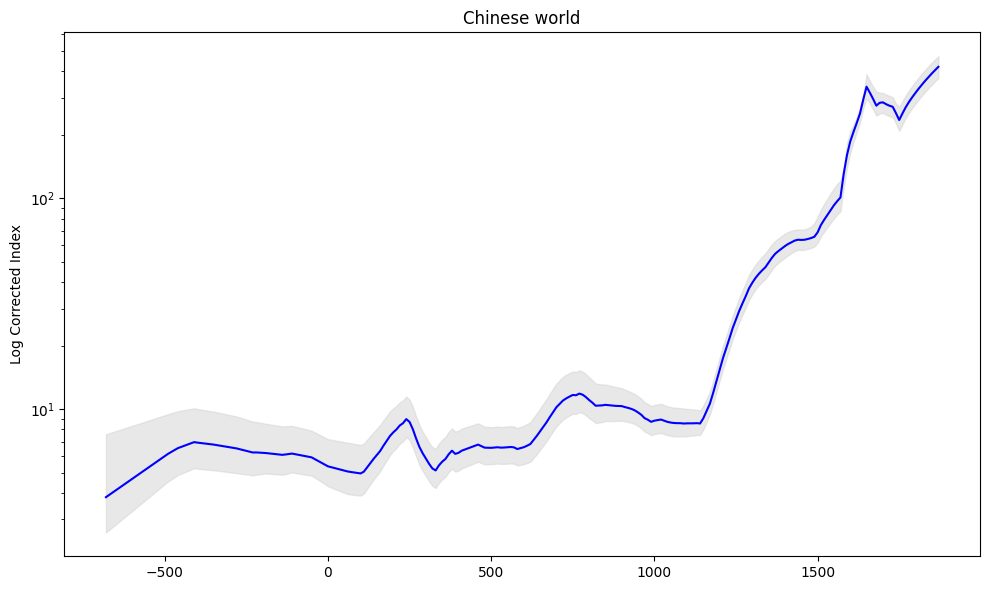

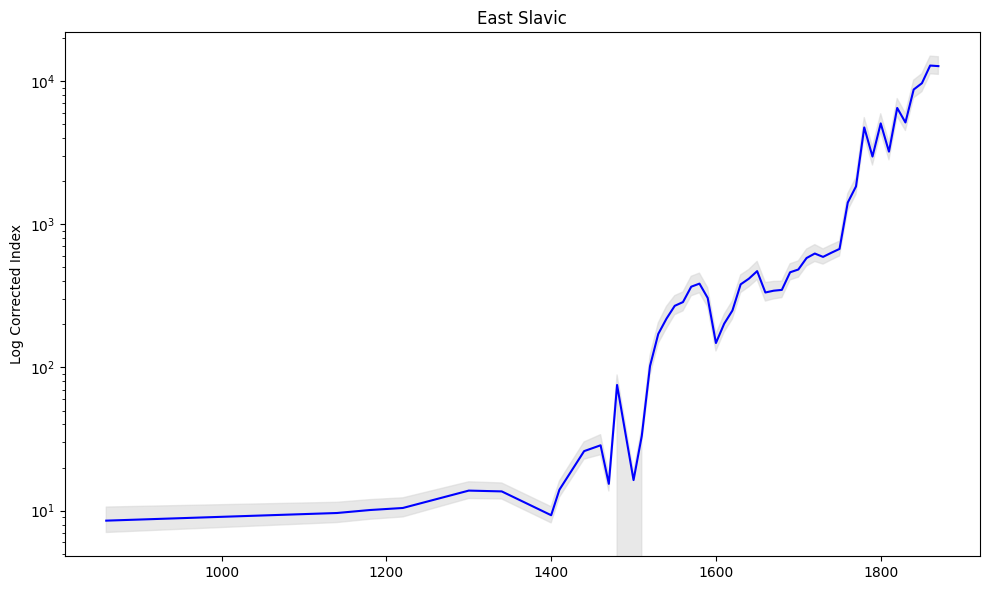

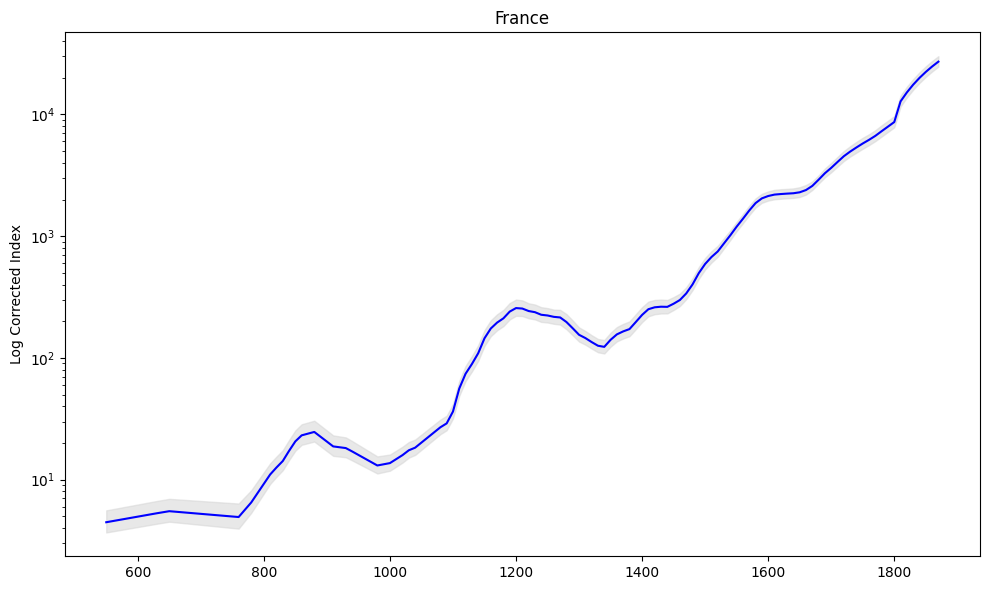

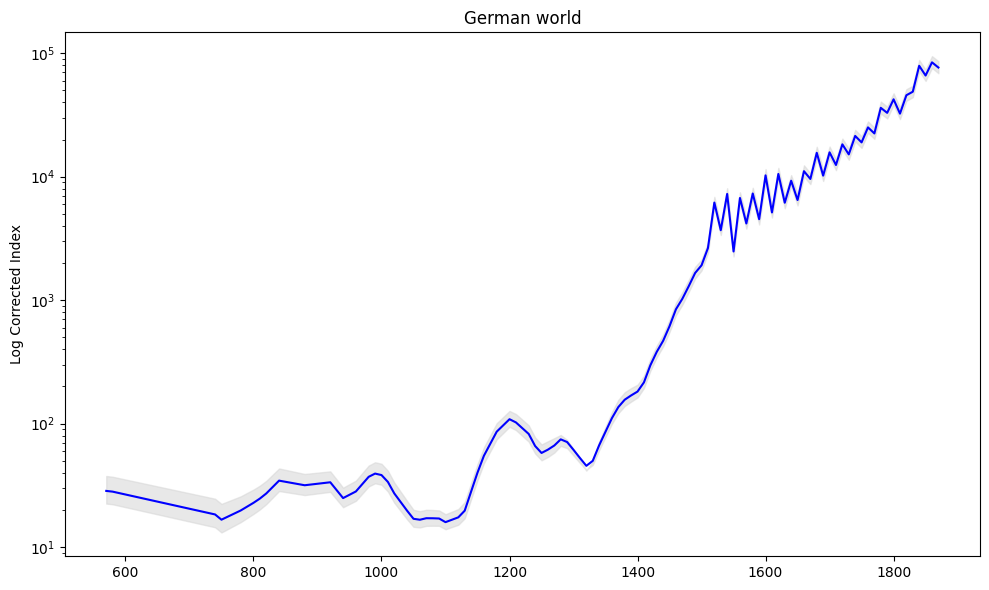

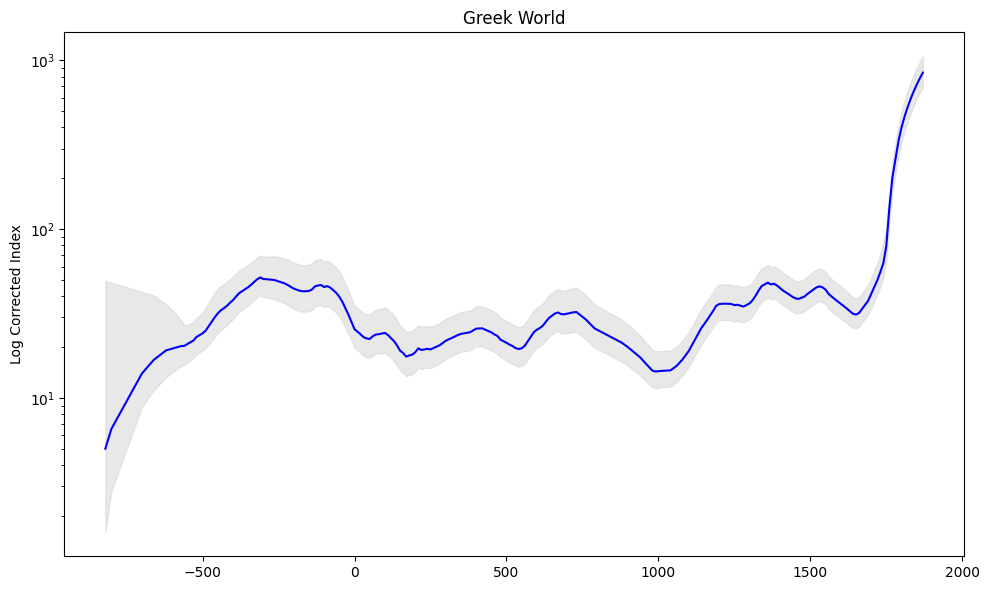

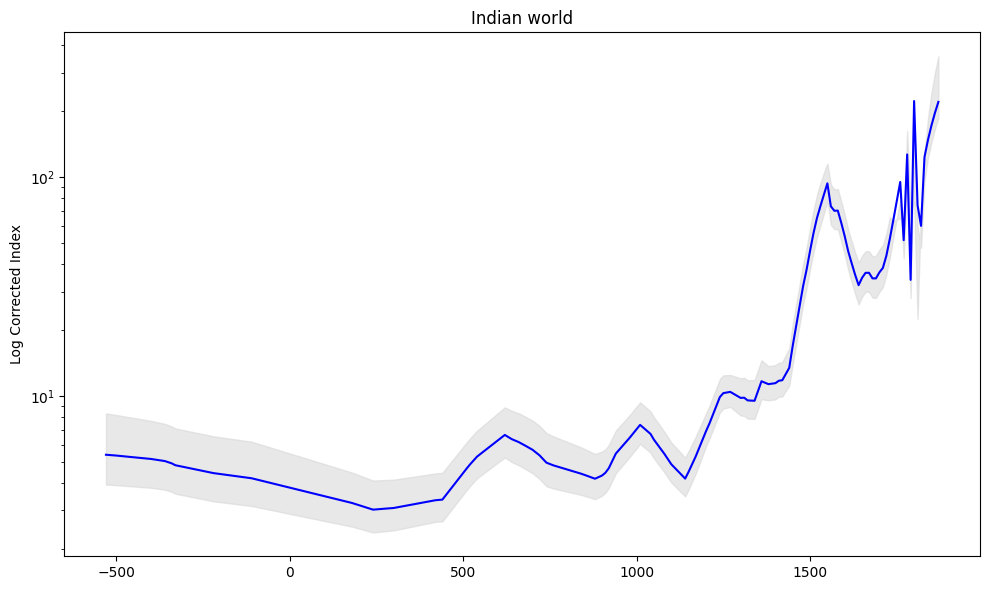

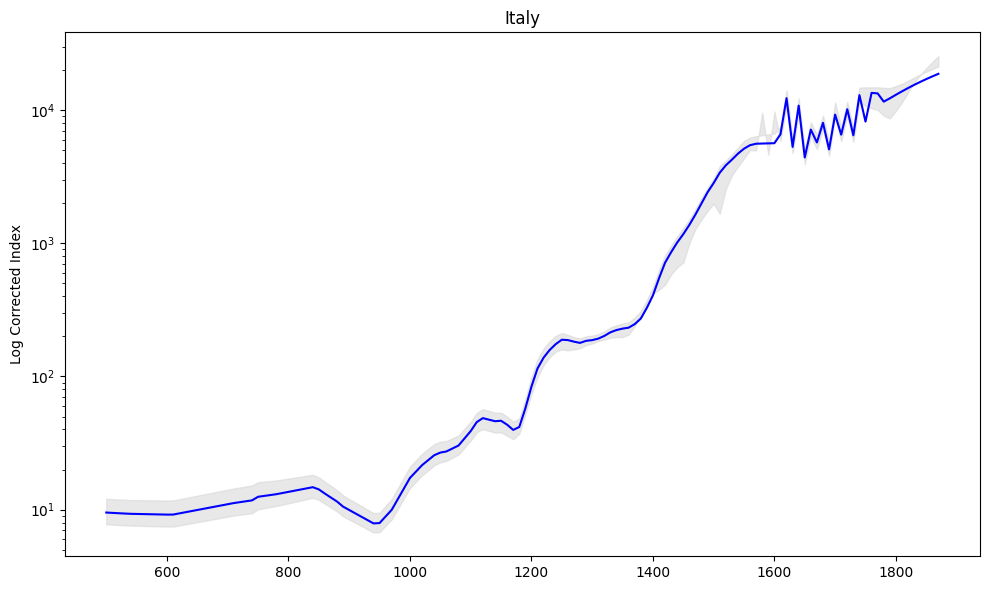

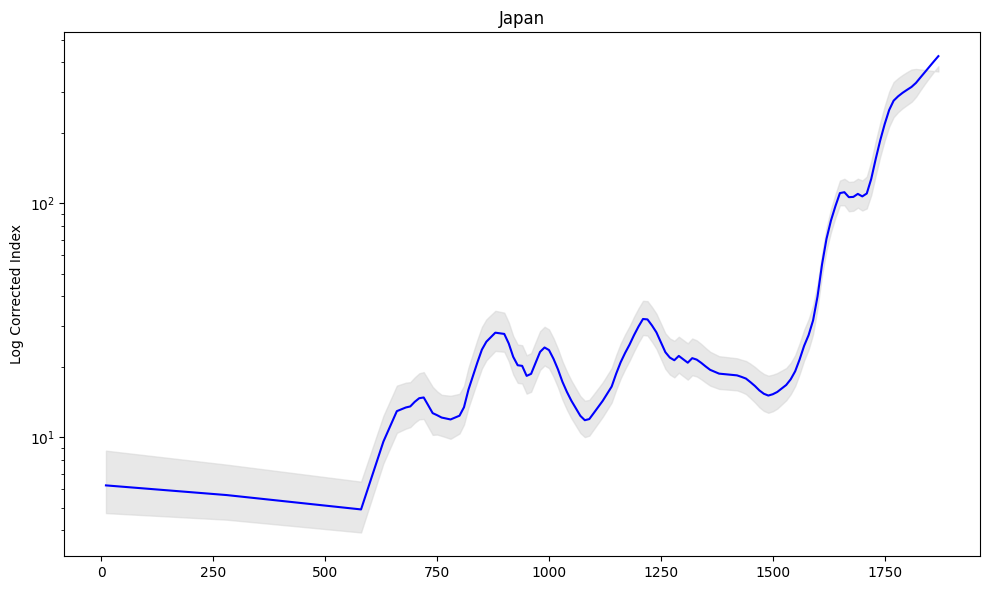

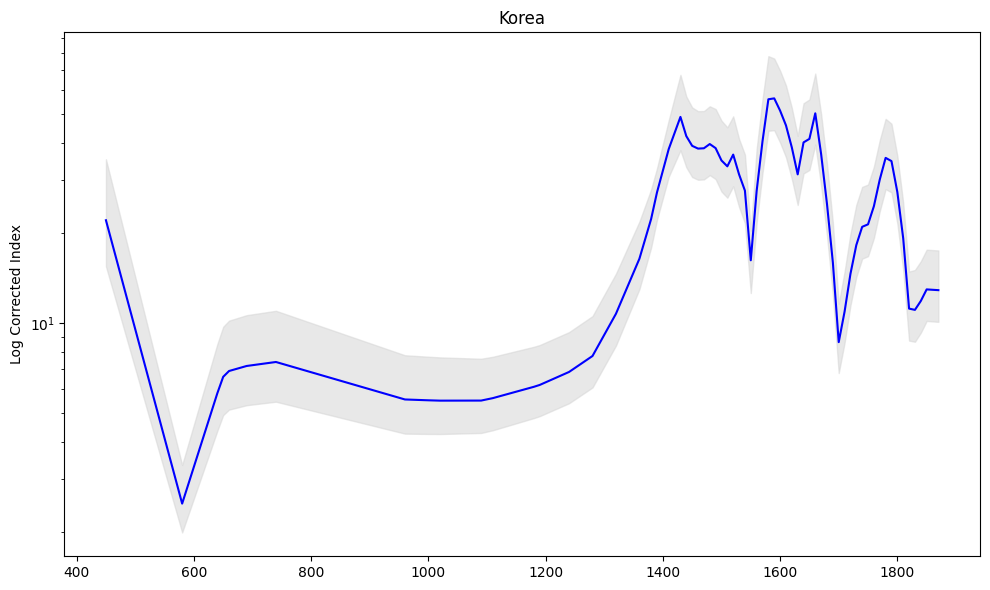

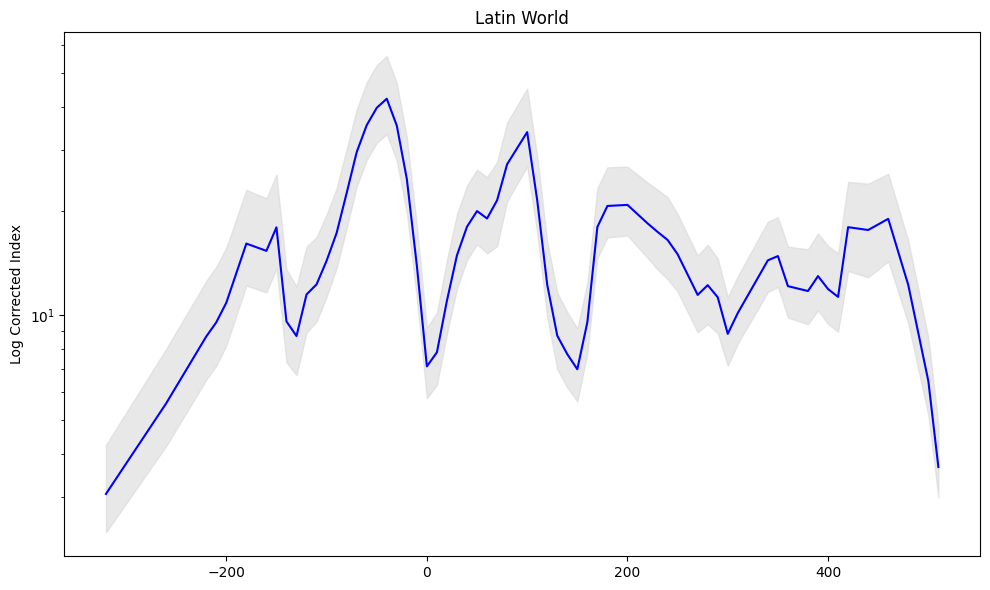

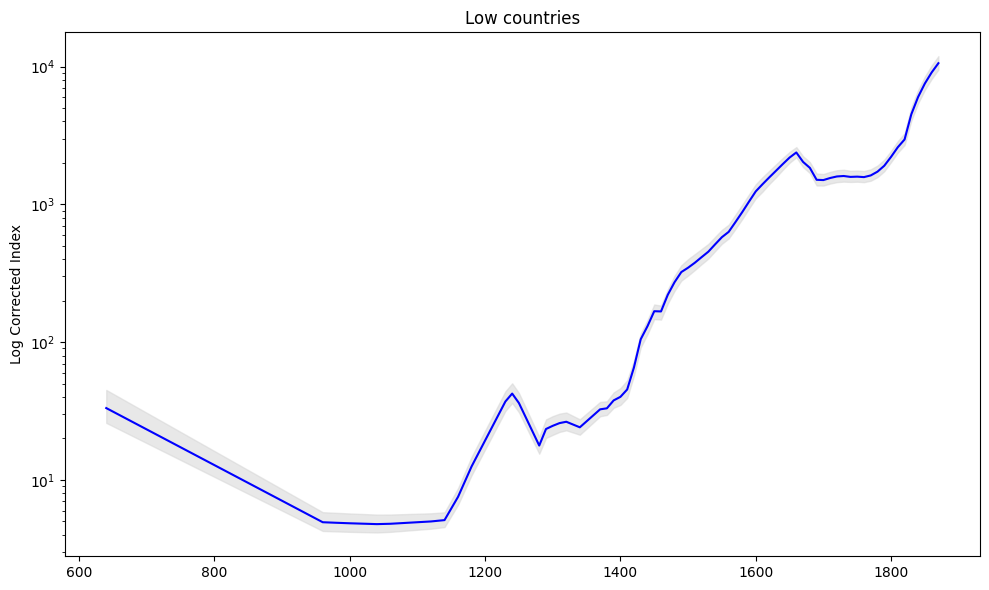

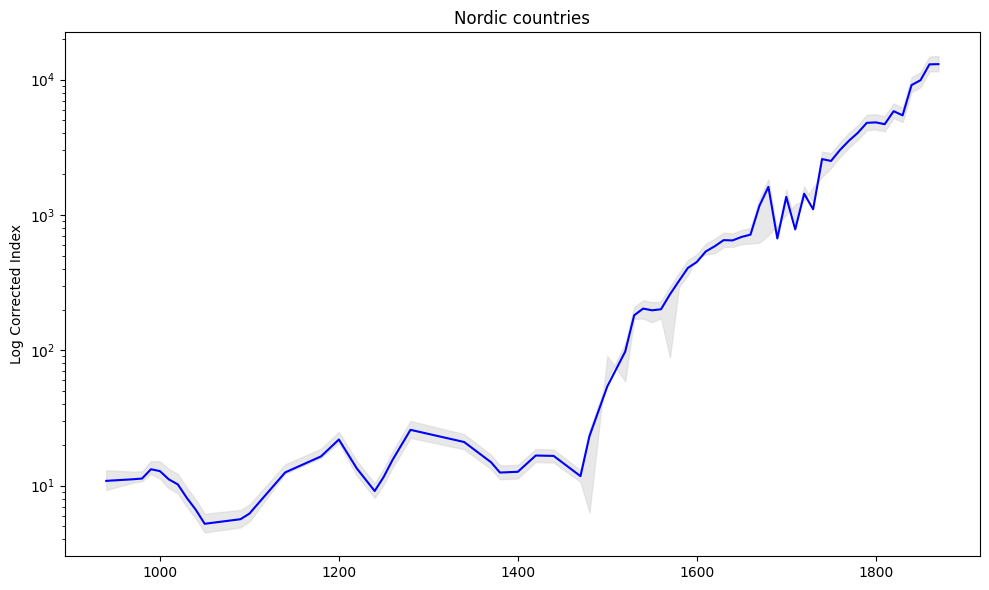

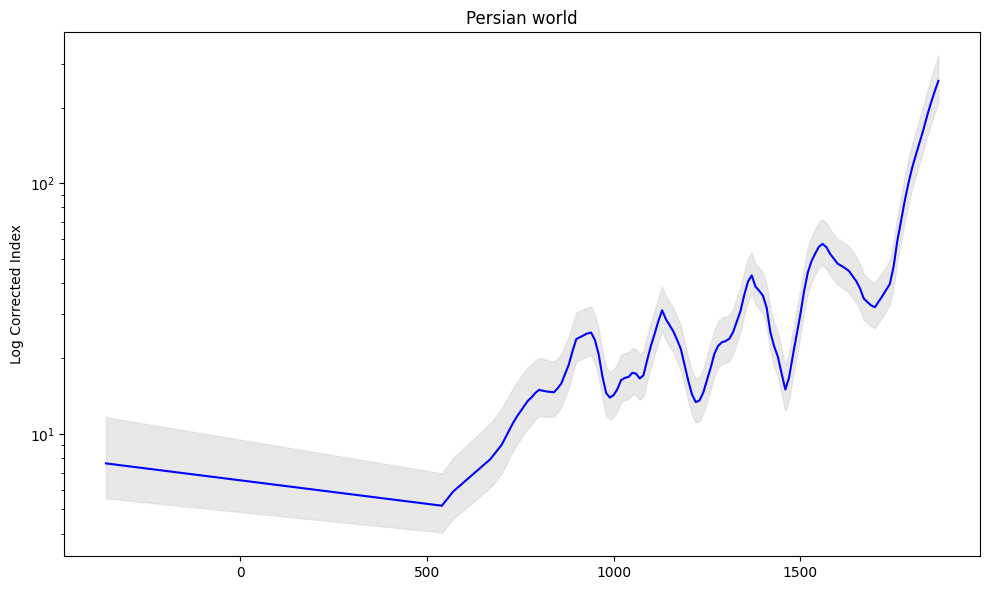

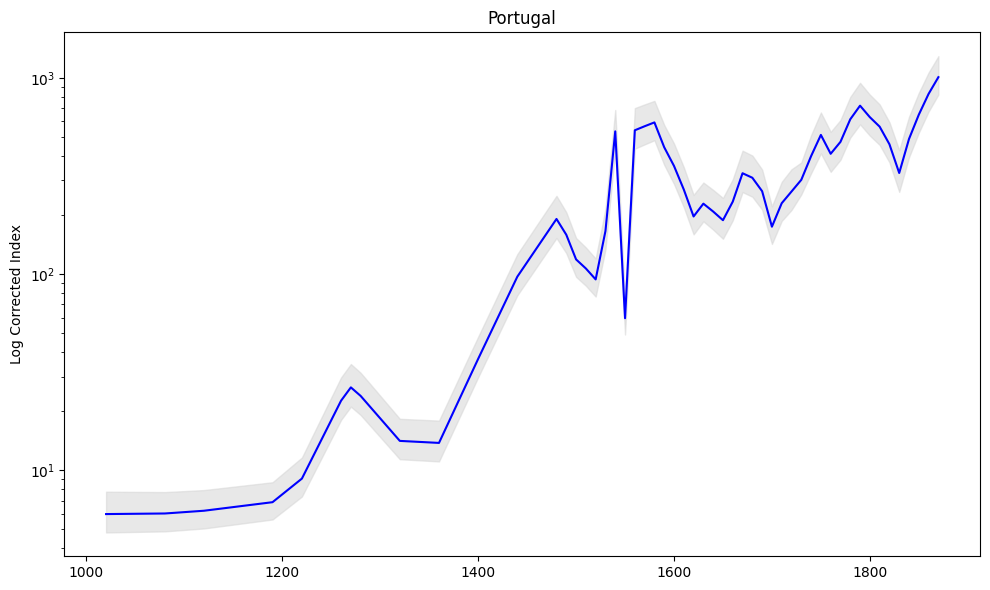

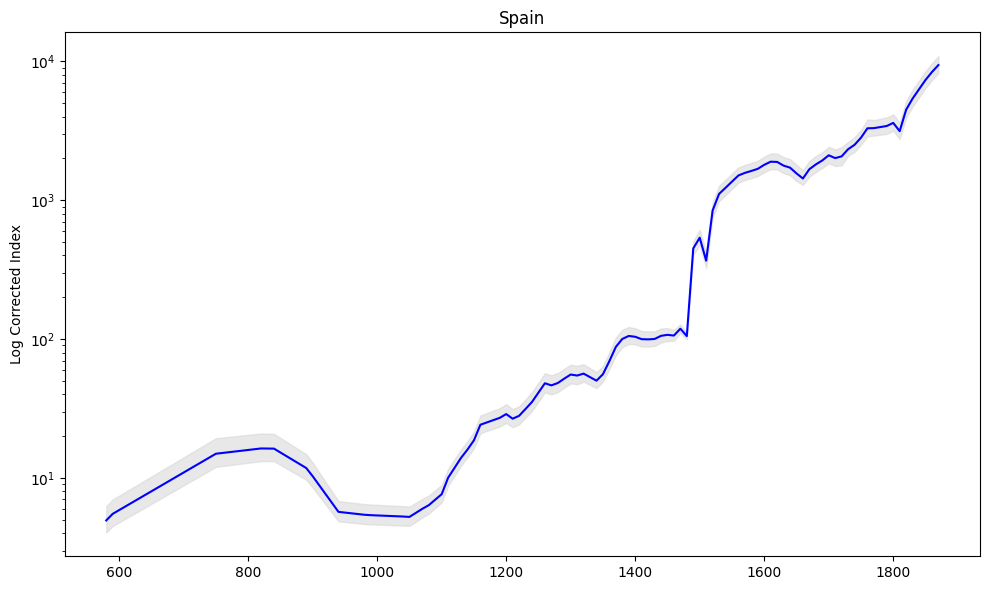

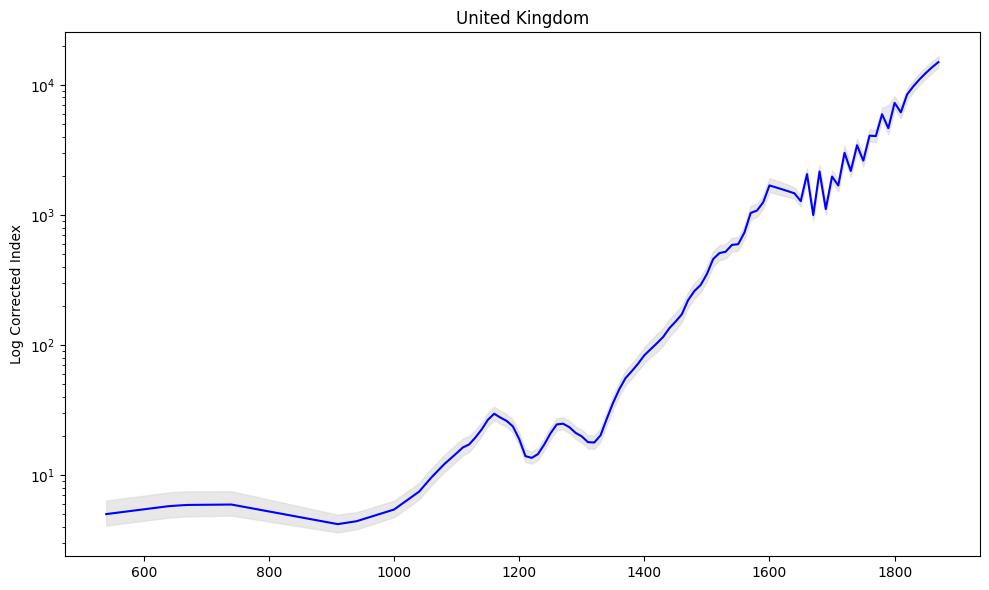

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import MultipleLocator



df = df_cultura.copy()

# Get unique region names
regions = df['region_name'].unique()

# Iterate through each region
for region in regions:
    # Subset data for the current region
    df_region = df[df['region_name'] == region]
    
    # Plot
    plt.figure(figsize=(10, 6))

    # Add LOESS regression lines for N_est, N_est_min, and N_est_max
    n = 0.1
    lowess = sm.nonparametric.lowess(df_region['N_est'], df_region['decade'], frac=n)
    plt.plot(lowess[:, 0], lowess[:, 1], label='N_est', color='blue')

    # Compute LOESS regressions for N_est_min and N_est_max
    lowess_min = sm.nonparametric.lowess(df_region['N_est_min'], df_region['decade'], frac=n)
    lowess_max = sm.nonparametric.lowess(df_region['N_est_max'], df_region['decade'], frac=n)

    # Fill between N_est_min and N_est_max LOESS regressions
    plt.fill_between(lowess_min[:, 0], lowess_min[:, 1], lowess_max[:, 1], color='lightgrey', alpha=0.5)

    # Set y-axis ticks to every 100
    plt.gca().yaxis.set_major_locator(MultipleLocator(100))
    
    # Set y-axis to log scale
    plt.yscale('log')

    # Add title and labels
    plt.title(region)
    plt.xlabel('')
    plt.ylabel('Log Corrected Index')

    # Show plot
    plt.tight_layout()
    plt.savefig(f'corrected_index/{region}.png')
    plt.show()
    
 
